In [1]:
#Importing dependencies: 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


In [2]:
#Displaying 3-yr Data Frame: 
df_3 = pd.read_csv('base_3_data.csv')
df_3.head()


,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,933,alfa-romeo,Alfa Romeo Giulia,blue,10/2021,2021,59790,280,Automatic,Petrol,6.7,10.0
1,934,alfa-romeo,Alfa Romeo Stelvio,blue,12/2021,2021,71090,280,Automatic,Petrol,7.3,490.0
2,935,alfa-romeo,Alfa Romeo Giulia,blue,09/2021,2021,70800,510,Automatic,Petrol,9.2,21373.0
3,936,alfa-romeo,Alfa Romeo Stelvio,blue,04/2021,2021,44750,209,Automatic,Diesel,5.7,66000.0
4,937,alfa-romeo,Alfa Romeo Giulia,blue,02/2021,2021,36650,190,Automatic,Diesel,4.8,50935.0


In [4]:
#Creating individual Data Frames for each year: 
Year2021_df = df_3.loc[df_3["year"] == 2021, :]
Year2022_df = df_3.loc[df_3["year"] == 2022, :]
Year2023_df = df_3.loc[df_3["year"] == 2023, :]

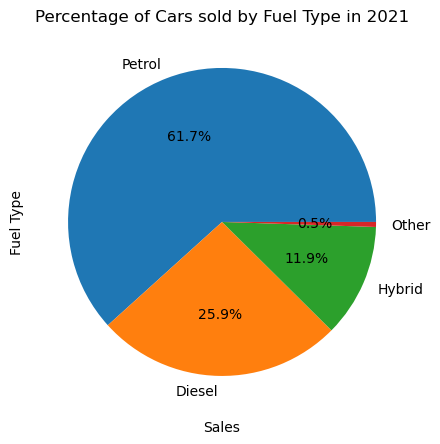

In [5]:
#Cleaning 2021 Data Frame to make Pie chart clear:
Clean2021_df = Year2021_df["fuel_type"].replace({'Diesel Hybrid' : 'Hybrid', 'Unknown' : 'Other', 'LPG': 'Other', 'CNG' : 'Other'})
data1 = Clean2021_df.value_counts()

#Creating Pie Chart showing Percentage of Sales by Fuel Type in 2022:
Chart2021 = data1.plot(kind="pie", autopct= "%1.1f%%", figsize=(5,5))
plt.title ("Percentage of Cars sold by Fuel Type in 2021")
plt.ylabel("Fuel Type")
plt.xlabel("Sales")
plt.savefig("Output_data/Pie_chart_Fuel_type_2021")

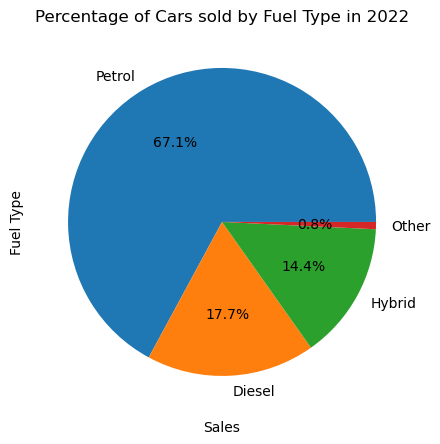

In [6]:
#Cleaning 2022 Data Frame to make Pie chart clear:
Clean2022_df = Year2022_df["fuel_type"].replace({'Diesel Hybrid' : 'Hybrid', 'Unknown' : 'Other', 'LPG': 'Other', 'CNG' : 'Other'})
data2 = Clean2022_df.value_counts()

#Creating Pie Chart showing Percentage of Sales by Fuel Type in 2021:
Chart2022 = data2.plot(kind="pie", autopct= "%1.1f%%", figsize=(5,5))
plt.title ("Percentage of Cars sold by Fuel Type in 2022")
plt.ylabel("Fuel Type")
plt.xlabel("Sales")
plt.savefig("Output_data/Pie_chart_Fuel_type_2022")

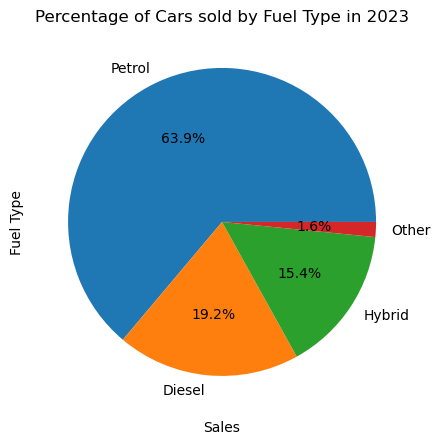

In [7]:
#Cleaning 2023 Data Frame to make Pie chart clear:
Clean2023_df = Year2023_df["fuel_type"].replace({'Diesel Hybrid' : 'Hybrid', 'Unknown' : 'Other', 'LPG': 'Other', 'CNG' : 'Other'})
data3 = Clean2023_df.value_counts()

#Creating Pie Chart showing Percentage of Sales by Fuel Type in 2023:
Chart2023 = data3.plot(kind="pie", autopct= "%1.1f%%", figsize=(5,5))
plt.title ("Percentage of Cars sold by Fuel Type in 2023")
plt.ylabel("Fuel Type")
plt.xlabel("Sales")
plt.savefig("Output_data/Pie_chart_Fuel_type_2023")

In [3]:
#Displaying 5-year Data Frame: 
df_5 = pd.read_csv('base_5_data.csv')
df_5.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,723,alfa-romeo,Alfa Romeo Stelvio,blue,08/2019,2019,41990,510,Automatic,Petrol,9.2,199000.0
1,724,alfa-romeo,Alfa Romeo Giulietta,blue,10/2019,2019,16995,120,Manual,Petrol,7.4,49700.0
2,725,alfa-romeo,Alfa Romeo Giulia,blue,02/2019,2019,30880,209,Automatic,Diesel,5.5,129357.0
3,726,alfa-romeo,Alfa Romeo Stelvio,blue,10/2019,2019,30890,190,Automatic,Diesel,6.1,82239.0
4,727,alfa-romeo,Alfa Romeo Stelvio,blue,05/2019,2019,68900,510,Unknown,Petrol,9.8,7000.0


In [8]:
#Cleaning 5-year Data Frame 
df_A5 = df_5.drop(['registration_date','price_in_euro','fuel_consumption_l_100km', 'mileage_in_km','power_ps','power_ps','Unnamed: 0','model','brand','color'], axis=1)

values_to_drop1 = ['Unknown']
df_AA5 = df_A5[~df_A5['transmission_type'].isin(values_to_drop1)]
df_AA5.loc[:, 'year'] = df_AA5['year'].astype(str)

In [12]:
#Grouping Data Frame to extract the sales per Transmission Type in each year: 

group1 = df_AA5.groupby(['year','transmission_type'])['fuel_type'].count().unstack(fill_value=0)
group1

transmission_type,Automatic,Manual,Semi-automatic
year,,,
2019,15282,9961,6
2020,9428,5633,7
2021,7204,4845,2
2022,10601,6099,1
2023,11935,7366,1


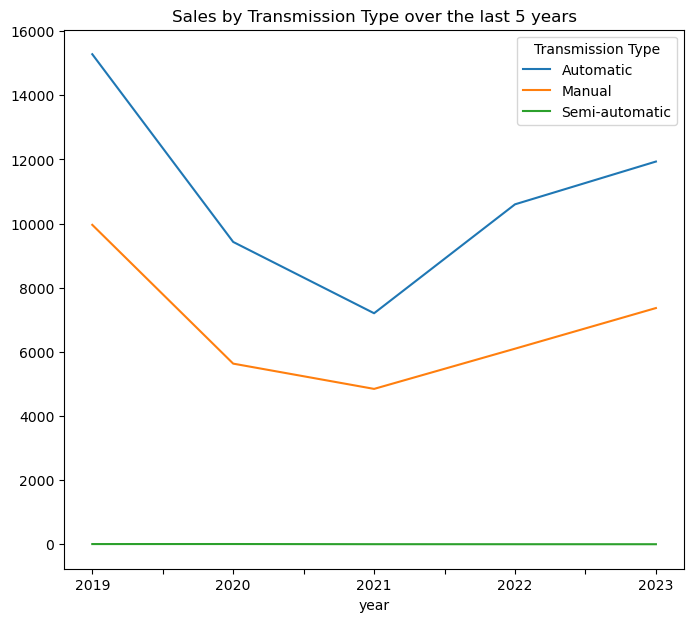

In [11]:
#Creating line graph showing Sales by Transmission Type over the last 5 years: 

group1.plot(kind="line",legend=True,figsize=(8,7), label={'Automatic','Manual','Semi-Automatic'})
plt.legend(title="Transmission Type")
plt.title("Sales by Transmission Type over the last 5 years")
plt.savefig("Output_data/Line_chart_Sales_by_Transmission")